In [52]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [53]:
tips = sns.load_dataset('tips')

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
# Data Manipulation with Pandas for Seaborn Plots

In [56]:
filter_tips = tips[tips["total_bill"]>20]

In [57]:
filter_tips.head()

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4


Text(0.5, 1.05, 'Tips vs Total Bill (Total Bill > 20)')

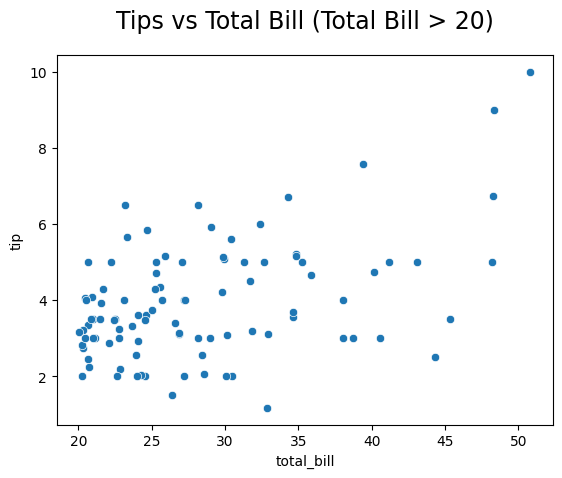

In [58]:
sns.scatterplot(x='total_bill',y='tip',data=filter_tips)
plt.title('Tips vs Total Bill (Total Bill > 20)',y=1.05,fontsize=17)

# sns.scatterplot(x='total_bill',y='tip',data=tips)

In [59]:
# Grouping and Aggregating Data

In [60]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
group_tips = tips.groupby('day').agg({'total_bill':"mean",'tip':'mean'}).reset_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_14428\1940950216.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_tips = tips.groupby('day').agg({'total_bill':"mean",'tip':'mean'}).reset_index()


In [62]:
group_tips

,day,total_bill,tip
0,Thur,17.682742,2.771452
1,Fri,17.151579,2.734737
2,Sat,20.441379,2.993103
3,Sun,21.410000,3.255132


Text(0.5, 1.0, 'Average Total Bill per Day')

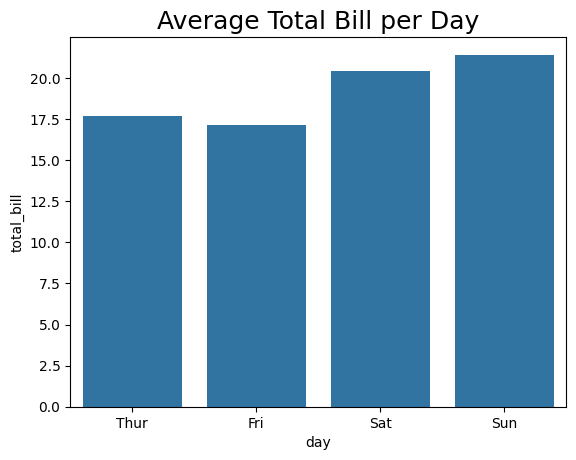

In [63]:
sns.barplot(x='day',y='total_bill',data=group_tips)
plt.title('Average Total Bill per Day',fontsize=18)

In [64]:
# Pivoting Data

In [65]:
pivot_tips = tips.pivot_table(values='total_bill',index='time',columns='day',aggfunc='mean',observed=True)
pivot_tips

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,17.664754,12.845714,NaN,NaN
Dinner,18.780000,19.663333,20.441379,21.41


<Axes: xlabel='day', ylabel='time'>

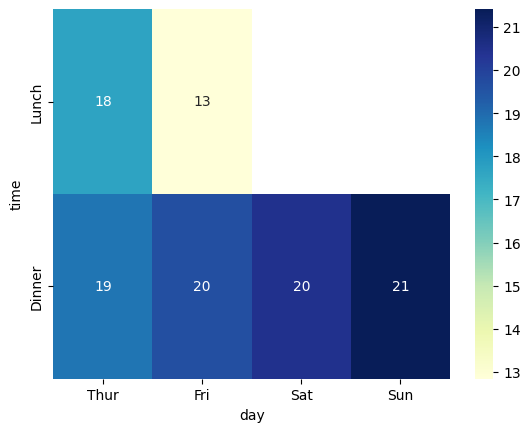

In [66]:
sns.heatmap(pivot_tips,annot=True,cmap='YlGnBu')

In [67]:
# Handling Datetime Data

In [68]:
data_rng = pd.date_range(start='2023-01-01',end='2023-01-10',freq='D')
data = pd.DataFrame(data_rng,columns=['Date'])

In [70]:
data["value"] = np.random.randint(0,100,size=(len(data_rng)))

In [71]:
data

,Date,value
0,2023-01-01,99
1,2023-01-02,8
2,2023-01-03,40
3,2023-01-04,98
4,2023-01-05,69
5,2023-01-06,57
6,2023-01-07,41
7,2023-01-08,20
8,2023-01-09,32
9,2023-01-10,74


In [72]:
data['Date'] = pd.to_datetime(data['Date'])

In [73]:
data

,Date,value
0,2023-01-01,99
1,2023-01-02,8
2,2023-01-03,40
3,2023-01-04,98
4,2023-01-05,69
5,2023-01-06,57
6,2023-01-07,41
7,2023-01-08,20
8,2023-01-09,32
9,2023-01-10,74


In [ ]:
# Resampling and Aggregating Time Series Data

In [75]:
data.set_index('Date',inplace=True)

In [76]:
weekly_data = data.resample('W').mean()

In [77]:
weekly_data

,value
Date,
2023-01-01,99.000000
2023-01-08,47.571429
2023-01-15,53.000000


In [79]:
weekly_data.reset_index(inplace=True)

In [80]:
weekly_data

,Date,value
0,2023-01-01,99.000000
1,2023-01-08,47.571429
2,2023-01-15,53.000000


In [81]:
# Visualizing Time Series Data

Text(0, 0.5, 'Average Value')

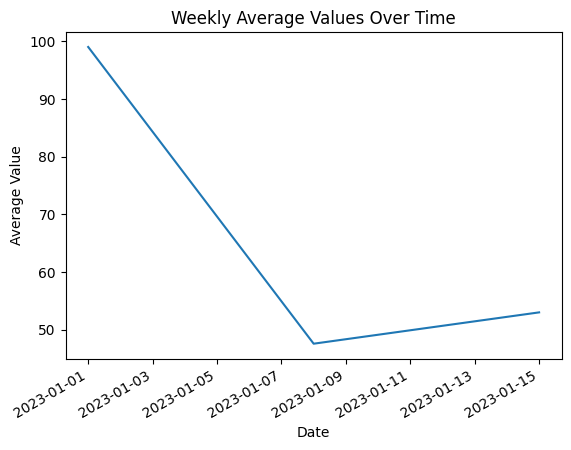

In [88]:
sns.lineplot(x='Date',y='value',data=weekly_data)
plt.gcf().autofmt_xdate()
plt.title("Weekly Average Values Over Time")
plt.ylabel("Average Value")